Concept: Why Remove Trends?

A trend is a long-term increase or decrease in the data. Removing it helps reveal the underlying periodic components or stationary behavior.

Methods for Trend Removal:

Differencing (Subtracting previous values)

Detrending with a Linear Fit

Using a Moving Average

Applying a High-Pass Filter

Using Seasonal Decomposition (Statsmodels)
    

Below I have simulated some data:

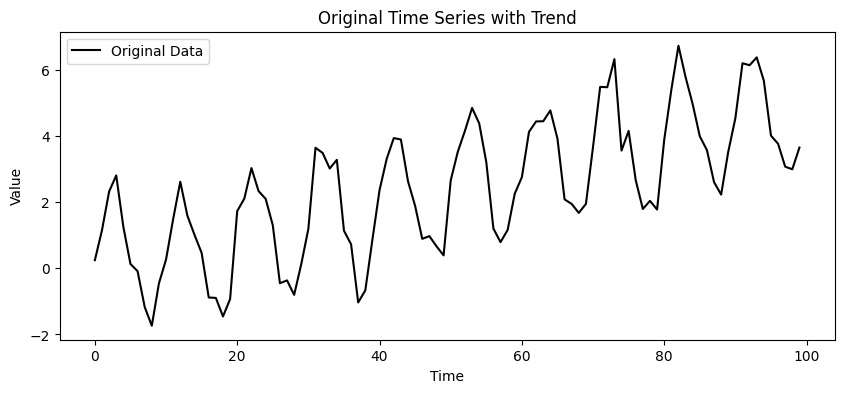

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import detrend
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate a synthetic time series
np.random.seed(42)
time = np.arange(100)  # Time points from 0 to 99
trend = 0.05 * time  # Linear increasing trend
seasonal = 2 * np.sin(2 * np.pi * time / 10)  # 10-day periodic cycle
noise = np.random.normal(scale=0.5, size=len(time))  # Random noise
data = trend + seasonal + noise  # Combine trend, seasonality, and noise

# Store in a DataFrame
df = pd.DataFrame({"Time": time, "Value": data})

# Plot the original time series
plt.figure(figsize=(10, 4))
plt.plot(df["Time"], df["Value"], label="Original Data", color="black")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Original Time Series with Trend")
plt.legend()
plt.show()

# Remove Trend Using Differencing

Concept: Differencing subtracts the previous value from the current one. It helps remove a linear trend.

New Value=Original Value−Previous Value

How to code:

name_of_your_table["Differenced"] = name_of_your_table["Value"].diff()


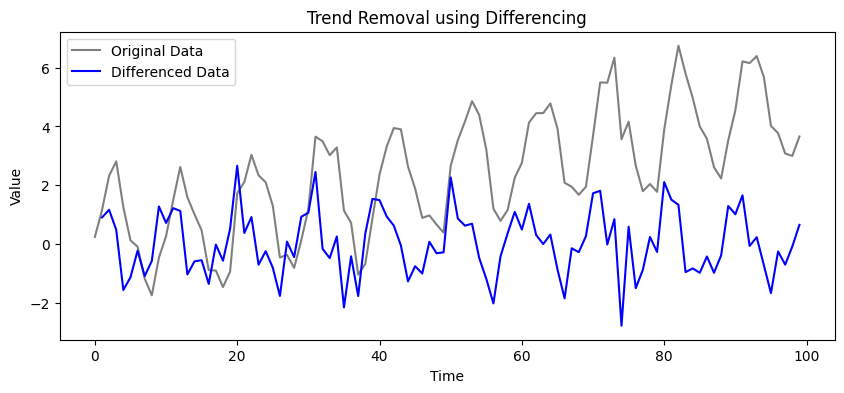

In [4]:
# Apply first-order differencing
df["Differenced"] = df["Value"].diff()

# Plot the result
plt.figure(figsize=(10, 4))
plt.plot(df["Time"], df["Value"], label="Original Data", color="black", alpha=0.5)
plt.plot(df["Time"], df["Differenced"], label="Differenced Data", color="blue")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Trend Removal using Differencing")
plt.legend()
plt.show()


# Remove Trend Using Linear Detrending (SciPy)

Concept: The detrend() function from SciPy removes a best-fit linear trend from the data.

name_of_your_table["Detrended"]= detrend(name_of_your_table["the_col_that_you_want_detrend"])

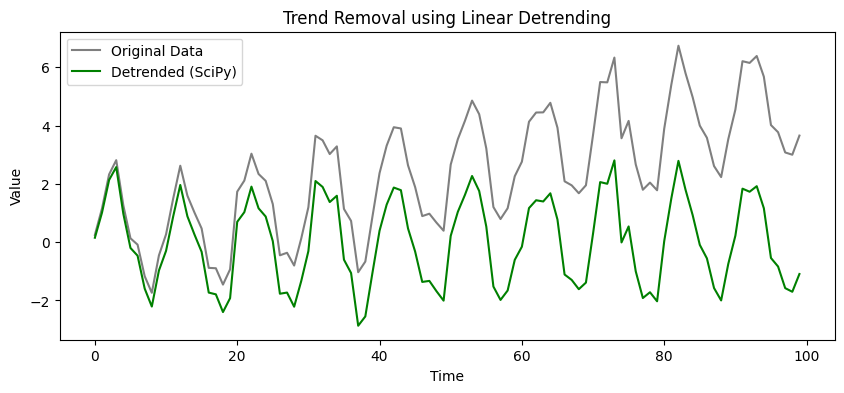

In [5]:
# Apply linear detrending
df["Detrended"] = detrend(df["Value"])

# Plot the result
plt.figure(figsize=(10, 4))
plt.plot(df["Time"], df["Value"], label="Original Data", color="black", alpha=0.5)
plt.plot(df["Time"], df["Detrended"], label="Detrended (SciPy)", color="green")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Trend Removal using Linear Detrending")
plt.legend()
plt.show()


# Remove Trend Using Moving Average

Concept: A moving average smooths the data over a sliding window, capturing the trend. Basically, the window moves across the data, computing the average of the points within the window for each position. We subtract this trend from the original data.

name_of_your_table["Moving_Avg"] = name_of_your_table["the_col_that_you_want_detrend"].rolling(window='put_a_number', min_periods=1,center=True).mean()

Window= A window of n means that at each time step, the rolling mean is calculated using n consecutive data points. By default, if there aren’t n values available, the result is NaN.

min_periods=1 → Allows partial windows
By default, rolling(window=n) requires at least n values to compute a mean. If you set min_periods=1, it allows the mean to be calculated even when fewer than n values are available.

Center=True → Centers the window around each point

By default, the rolling window is right-aligned (center=False), meaning it uses current and past values. If you set center=True, the window is centered around each time point.


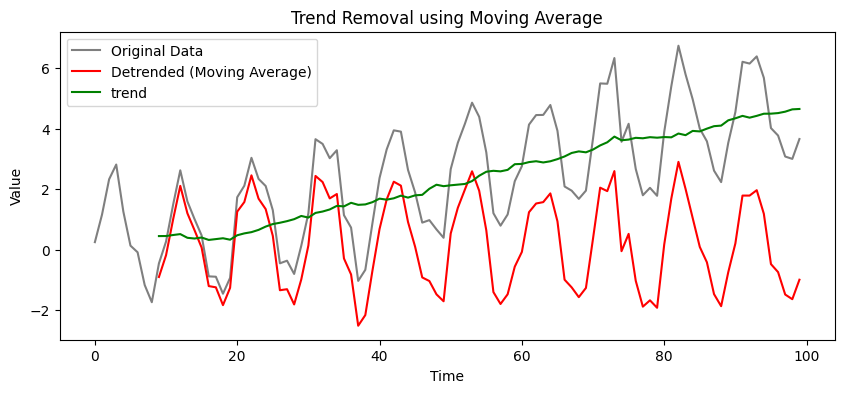

In [31]:
# Compute moving average (window size = 10)
df["Moving_Avg"] = df["Value"].rolling(window=10, center=False).mean()

# Subtract moving average from original data
df["Moving_Detrended1"] = df["Value"] - df["Moving_Avg"]


# Plot the result
plt.figure(figsize=(10, 4))
plt.plot(df["Time"], df["Value"], label="Original Data", color="black", alpha=0.5)
plt.plot(df["Time"], df["Moving_Detrended1"], label="Detrended (Moving Average)", color="red")
plt.plot(df["Time"], df["Moving_Avg"], label="trend", color="green")
plt.xlabel("Time")
plt.ylabel("Value")
plt.title("Trend Removal using Moving Average")
plt.legend()
plt.show()